In [1]:
# import time
# import cv2
# import numpy as np
# from skimage.util import img_as_float
# from skimage.util import img_as_ubyte


# def show_in_moved_window(win_name, img, x, y):
#     """
#     Show an image in a window, where the position of the window can be given
#     """
#     cv2.namedWindow(win_name)
#     cv2.moveWindow(win_name, x, y)
#     cv2.imshow(win_name,img)


# def capture_from_camera_and_show_images():
#     print("Starting image capture")

#     print("Opening connection to camera")
#     url = 0
#     use_droid_cam = True
#     if use_droid_cam:
#         url = "http://10.25.19.50:4747/video"
#     cap = cv2.VideoCapture(url)
#     # cap = cv2.VideoCapture(0)
#     if not cap.isOpened():
#         print("Cannot open camera")
#         exit()

#     print("Starting camera loop")
#     # Get first image
#     ret, frame = cap.read()
#     # if frame is read correctly ret is True
#     if not ret:
#         print("Can't receive frame")
#         exit()

#     # Transform image to gray scale and then to float, so we can do some processing
#     frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     frame_gray = img_as_float(frame_gray)

#     # To keep track of frames per second
#     start_time = time.time()
#     n_frames = 0
#     stop = False
#     while not stop:
#         ret, new_frame = cap.read()
#         if not ret:
#             print("Can't receive frame. Exiting ...")
#             break

#         # Transform image to gray scale and then to float, so we can do some processing
#         new_frame_gray = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
#         new_frame_gray = img_as_float(new_frame_gray)

#         # Compute difference image
#         dif_img = np.abs(new_frame_gray - frame_gray)

#         # Keep track of frames-per-second (FPS)
#         n_frames = n_frames + 1
#         elapsed_time = time.time() - start_time
#         fps = int(n_frames / elapsed_time)

#         # Put the FPS on the new_frame
#         str_out = f"fps: {fps}"
#         font = cv2.FONT_HERSHEY_COMPLEX
#         cv2.putText(new_frame, str_out, (100, 100), font, 1, 255, 1)

#         # Display the resulting frame
#         show_in_moved_window('Input', new_frame, 0, 10)
#         show_in_moved_window('Input gray', new_frame_gray, 600, 10)
#         show_in_moved_window('Difference image', dif_img, 1200, 10)

#         # Old frame is updated
#         frame_gray = new_frame_gray

#         if cv2.waitKey(1) == ord('q'):
#             stop = True

#     print("Stopping image loop")
#     cap.release()
#     cv2.destroyAllWindows()


# if __name__ == '__main__':
#     capture_from_camera_and_show_images()

In [2]:
from skimage import color, io, measure, img_as_ubyte, img_as_float
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np

In [3]:
input_path = "data/"
first_img_path = "pic1.jpeg"
second_img_path = "pic2.jpeg"
first_img = io.imread(input_path + first_img_path)
second_img = io.imread(input_path + second_img_path)


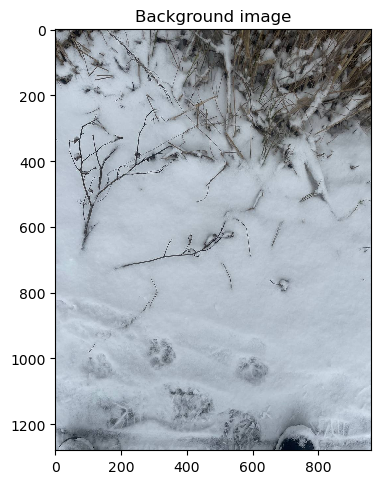

In [4]:
io.imshow(first_img)
plt.title("Background image")
io.show()

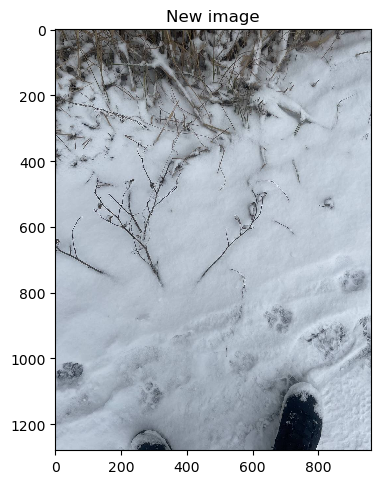

In [5]:
io.imshow(second_img)
plt.title("New image")
io.show()

* Acquire a background image, convert it to grayscale and then to floating point
Start a loop:
* Acquire a new image, convert it to grayscale and then to floating point
* Computes an absolute difference image between the new image and the background image.
* Creates a binary image by applying a threshold, T, to the difference image.
* Computes the total number of foreground, F, pixels in the foreground image.
* Compute the percentage of foreground pixels compared to the total number of pixels in the image (F).
* Decides if an alarm should be raised if F is larger than an alert value, A.
* If an alarm is raised, show a text on the input image. For example Change Detected!.
* Shows the input image, the backround image, the difference image, and the binary image. The binary image should be converted to uint8 using img_as_ubyte.

### Grayscale and floating point

(-0.5, 959.5, 1279.5, -0.5)

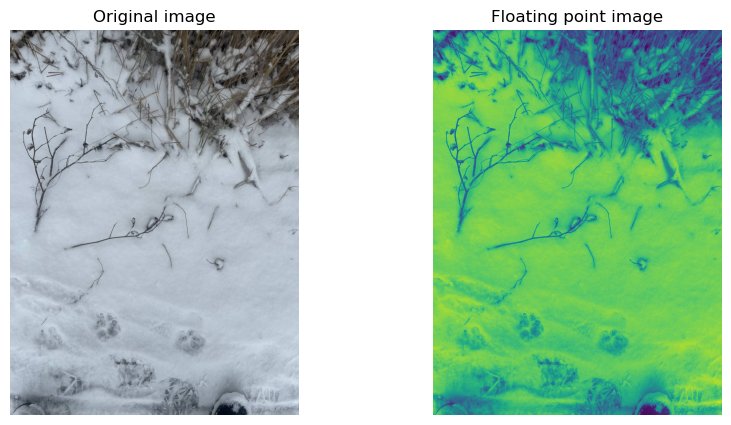

In [6]:
from skimage.color import rgb2gray

first_gray_img = rgb2gray(first_img)
first_floating_img = img_as_float(first_gray_img)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(first_img, cmap='gray')
axes[0].set_title("Original image")
axes[0].axis("off")
axes[1].imshow(first_floating_img)
axes[1].set_title("Floating point image")
axes[1].axis("off")


(-0.5, 959.5, 1279.5, -0.5)

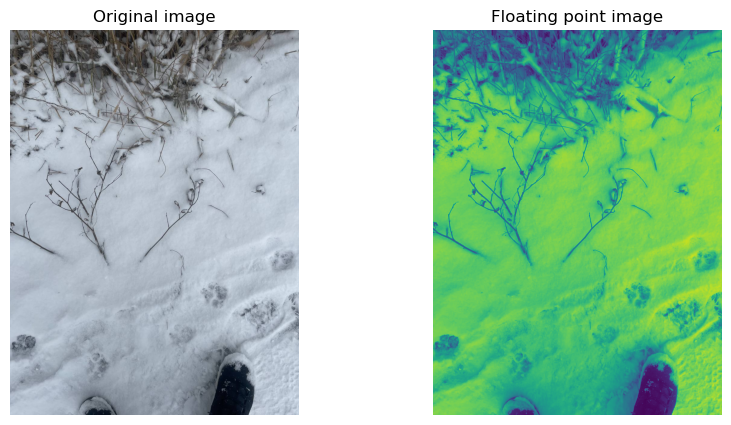

In [7]:
second_gray_img = rgb2gray(second_img)
second_floating_img = img_as_float(second_gray_img)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(second_img, cmap="gray")
axes[0].set_title("Original image")
axes[0].axis("off")
axes[1].imshow(second_floating_img)
axes[1].set_title("Floating point image")
axes[1].axis("off")

### Difference between images

array([[-0.07843137, -0.00784314, -0.00335608, ...,  0.34349882,
         0.35134196,  0.35526353],
       [-0.06666667, -0.01568627, -0.01512078, ...,  0.3687098 ,
         0.37655294,  0.37263137],
       [-0.05490196, -0.01568627, -0.02269608, ...,  0.39002196,
         0.38610039,  0.38217882],
       ...,
       [ 0.11262431,  0.12438902,  0.14007529, ...,  0.08627451,
         0.10588235,  0.10980392],
       [ 0.11654588,  0.12831059,  0.14007529, ...,  0.0745098 ,
         0.09411765,  0.10196078],
       [ 0.12046745,  0.12831059,  0.14399686, ...,  0.05882353,
         0.06666667,  0.0745098 ]])

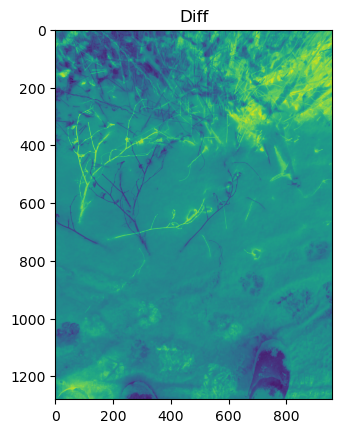

In [8]:
diff = second_floating_img - first_floating_img
plt.title("Diff")
plt.imshow(diff)
diff

### Binary thresholding

0.11269694010416667

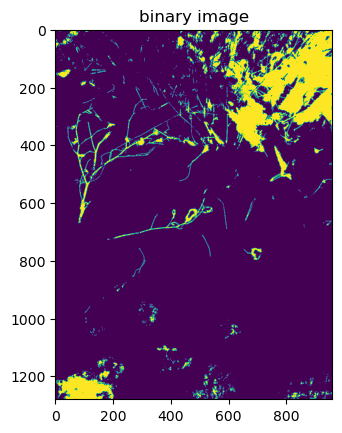

In [9]:
mask = diff > 0.2
plt.title("binary image")
plt.imshow(mask)
# Computes the total number of foreground, F, pixels in the foreground image.
F = mask.sum() 
# Total number of pixels
total = np.size(mask)
percentage_change = F / total
percentage_change

### Raise alarm for what lol

In [10]:
A = 0.5
percentage_change < A

True

### Update background image

In [11]:
alpha = 0.95
threshold = 0.2
new_background = alpha * first_floating_img + (1 - alpha) * second_floating_img

### Save image for fun

In [12]:
import cv2

In [15]:
cv2.imwrite(
    "/data/background.jpg",
    first_floating_img * 255,
)
cv2.imwrite(
    "/data/new.jpg",
    second_floating_img * 255,
)
cv2.imwrite(
    "/data/diff.jpg",
    diff * 255,
)
cv2.imwrite(
    "/data/mask.jpg",
    mask * 255,
)

True